<a href="https://colab.research.google.com/github/Saadi128/EDA-PROJECT-REPORT/blob/main/Deep_Learning_Module_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Atomcamp DS&AI Bootcamp 2025/Deep Learning/Higgs Boson training.csv')

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Atomcamp DS&AI Bootcamp 2025/Deep Learning/Higgs Boson test.csv')

In [ ]:
df_test.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


In [ ]:
df

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [ ]:
df.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [ ]:
df.shape

(250000, 33)

In [ ]:
df.isnull().sum()

,0
EventId,0
DER_mass_MMC,0
DER_mass_transverse_met_lep,0
DER_mass_vis,0
DER_pt_h,0
DER_deltaeta_jet_jet,0
DER_mass_jet_jet,0
DER_prodeta_jet_jet,0
DER_deltar_tau_lep,0
DER_pt_tot,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
X = df.drop('Label', axis=1)
y = df['Label']

In [ ]:
X.shape, y.shape

((250000, 32), (250000,))

In [ ]:
y.value_counts()

,count
Label,
b,164333
s,85667


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
continuous_features = [col for col in df.columns if col not in ['EventId', 'Label', 'Weight']] # Adjust exclusion list

df[continuous_features] = df[continuous_features].replace(-999.0, float('nan'))
df[continuous_features] = df[continuous_features].fillna(method='ffill', axis=0).fillna(method='bfill', axis=0)


# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the continuous features
df[continuous_features] = scaler.fit_transform(df[continuous_features])

# Display the first few rows of the DataFrame with normalized features
print(df.head())

# Display the descriptive statistics of the normalized features
print(df[continuous_features].describe())

/tmp/ipython-input-15-1798786982.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[continuous_features] = df[continuous_features].fillna(method='ffill', axis=0).fillna(method='bfill', axis=0)


   EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0   100000      0.290932                     0.068332      0.407680 -0.469966   
1   100001      0.683273                     0.552505      0.540136 -0.153167   
2   100002      0.683273                     3.195156      1.096560 -0.349710   
3   100003      0.385844                     0.910379     -0.005853 -0.903016   
4   100004      0.943942                    -0.914556      1.313369 -0.651804   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0             -0.857031         -0.620616             0.971927   
1             -0.857031         -0.620616             0.971927   
2             -0.857031         -0.620616             0.971927   
3             -0.857031         -0.620616             0.971927   
4             -0.857031         -0.620616             0.971927   

   DER_deltar_tau_lep  DER_pt_tot  ...  PRI_jet_num  PRI_jet_leading_pt  \
0            0.882478    1.033099  ...   

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

X = df.drop(['EventId', 'Label', 'Weight'], axis=1) # Adjust exclusion list
y = df['Label'].apply(lambda x: 1 if x == 's' else 0) # Convert 's' to 1 and 'b' to 0

# Split into train and temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Split temp into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp) # 0.5 of 0.3 is 0.15

print(f'Training set shape: {X_train.shape}')
print(f'Validation set shape: {X_val.shape}')
print(f'Test set shape: {X_test.shape}')
print(f'Training set label distribution:\n{y_train.value_counts(normalize=True)}')
print(f'Validation set label distribution:\n{y_val.value_counts(normalize=True)}')
print(f'Test set label distribution:\n{y_test.value_counts(normalize=True)}')


Training set shape: (175000, 30)
Validation set shape: (37500, 30)
Test set shape: (37500, 30)
Training set label distribution:
Label
0    0.657331
1    0.342669
Name: proportion, dtype: float64
Validation set label distribution:
Label
0    0.657333
1    0.342667
Name: proportion, dtype: float64
Test set label distribution:
Label
0    0.657333
1    0.342667
Name: proportion, dtype: float64


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the model architecture
model = Sequential([
  Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
  BatchNormalization(),
  Dropout(0.3),
  Dense(64, activation='relu'),
  BatchNormalization(),
  Dropout(0.3),
  Dense(32, activation='relu'),
  BatchNormalization(),
  Dropout(0.3),
  Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

# Set training parameters
epochs = 10
batch_size = 32

# Train the model
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5469/5469 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.7507 - loss: 0.5139 - val_accuracy: 0.8261 - val_loss: 0.3875 - learning_rate: 0.0010
Epoch 2/10
5469/5469 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8108 - loss: 0.4177 - val_accuracy: 0.8297 - val_loss: 0.3825 - learning_rate: 0.0010
Epoch 3/10
5469/5469 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8168 - loss: 0.4070 - val_accuracy: 0.8335 - val_loss: 0.3780 - learning_rate: 0.0010
Epoch 4/10
5469/5469 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.8213 - loss: 0.4017 - val_accuracy: 0.8345 - val_loss: 0.3728 - learning_rate: 0.0010
Epoch 5/10
5469/5469 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.8223 - loss: 0.3980 - val_accuracy: 0.8373 - val_loss: 0.3731 - learning_rate: 0.0010
Epoch 6/10
5469/5469 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8241 - loss: 0.3962 - val_accuracy: 0.8358 - val_loss: 0.3701 - learning_rate: 0.0010
Epoch 7/10
5469/5469 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8

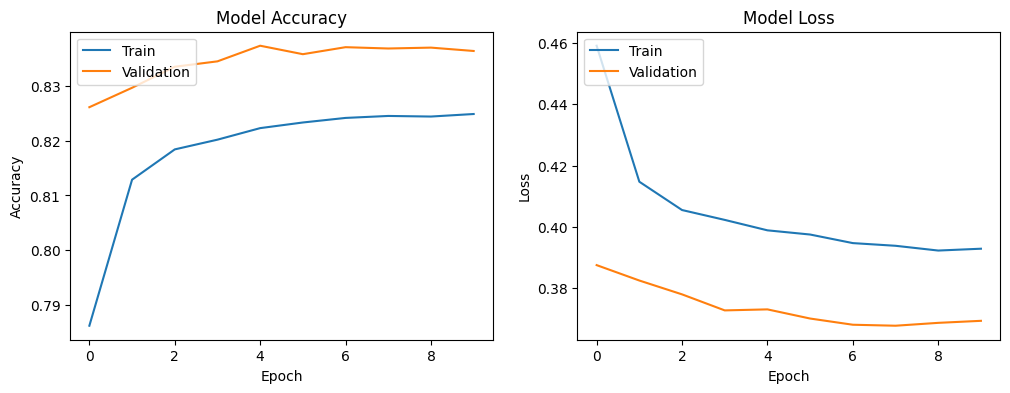

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

--- Performance Metrics on Test Set ---
Accuracy: 0.8401
Precision: 0.8000
Recall: 0.7111
F1 Score: 0.7529


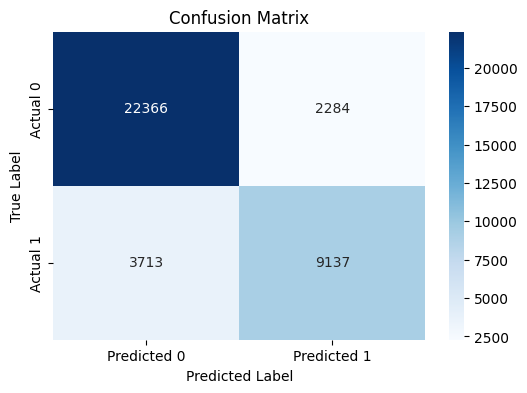

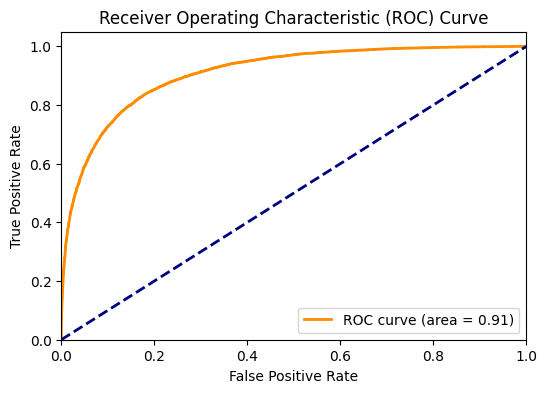


--- XGBoost Baseline Model ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:38:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- Performance Metrics for XGBoost on Test Set ---
Accuracy: 0.8403
Precision: 0.7863
Recall: 0.7332
F1 Score: 0.7589


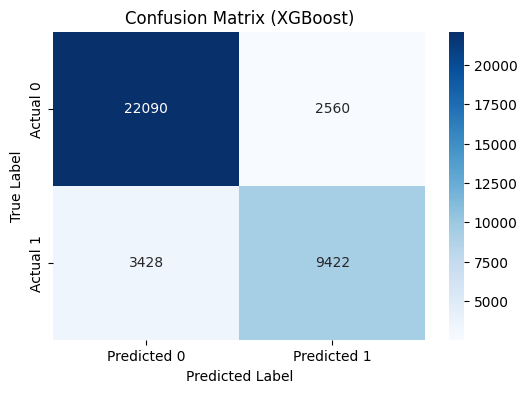

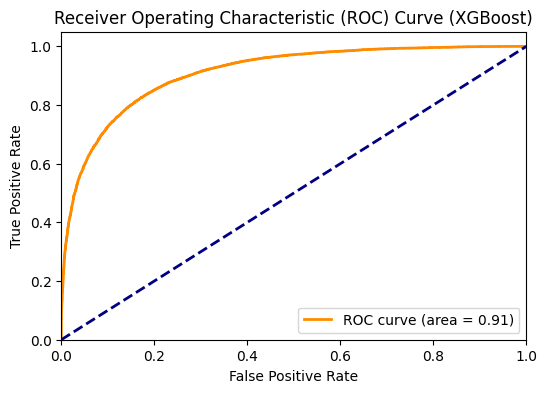


--- Comparison Summary ---
Neural Network Test Accuracy: 0.8401
XGBoost Test Accuracy: 0.8403
Neural Network Test ROC-AUC: 0.9085
XGBoost Test ROC-AUC: 0.9089


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns

# Plot training and validation accuracy/loss curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Predict probabilities on the test set
y_pred_proba = model.predict(X_test).ravel()
# Predict class labels on the test set (threshold is 0.5)
y_pred = (y_pred_proba > 0.5).astype(int)

# Report performance metrics
print("\n--- Performance Metrics on Test Set ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Compare performance with a tree-based baseline (e.g., XGBoost)
!pip install xgboost
import xgboost as xgb

print("\n--- XGBoost Baseline Model ---")

# Define and train the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1] # Get probability of the positive class

# Report performance metrics for XGBoost
print("\n--- Performance Metrics for XGBoost on Test Set ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb):.4f}")

# Confusion Matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (XGBoost)')
plt.show()

# ROC-AUC Curve for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (XGBoost)')
plt.legend(loc="lower right")
plt.show()

print("\n--- Comparison Summary ---")
print(f"Neural Network Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"XGBoost Test Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Neural Network Test ROC-AUC: {roc_auc:.4f}")
print(f"XGBoost Test ROC-AUC: {roc_auc_xgb:.4f}")